In [122]:
url = "http://stats-prod.nba.com/wp-json/statscms/v1/synergy/player//?category=Transition&season=2015&seasonType=Reg&names=offensive&limit=10"
#url == SynergyPlayersPlayTypeStats Request

In [123]:
import pandas as pd
import requests
import json

# Test 2

In [124]:
url = "http://stats-prod.nba.com/wp-json/statscms/v1/synergy/player//?category=Transition&season=2015&seasonType=Reg&names=offensive&limit=10=json"
respuestas = requests.get(url) # we request the information from the url
respuestas.content # representation of the content

b'{"result_count":405,"results":[{"PlayerIDSID":2365,"PlayerFirstName":"Chris","PlayerLastName":"Andersen","PlayerNumber":7,"P":"F-C","TeamIDSID":1610612763,"TeamName":"Memphis Grizzlies","TeamNameAbbreviation":"MEM","TeamShortName":"Memphis","GP":20,"Poss":7,"Time":8.1395301818847993757799486047588288784027099609375,"Points":12,"FGA":5,"FGM":5,"PPP":1.7142900228499999837339373698341660201549530029296875,"WorsePPP":0,"BetterPPP":0,"PossG":0.34999999999999997779553950749686919152736663818359375,"PPG":0.59999999999999997779553950749686919152736663818359375,"FGAG":0.25,"FGMG":0.25,"FGmG":0,"FGm":0,"FG":100,"aFG":100,"FT":14.28571428571400048213035915978252887725830078125,"TO":14.28571428571400048213035915978252887725830078125,"SF":0,"PlusOne":0,"Score":85.714285714286006623296998441219329833984375,"name":"Offensive","season":2015,"seasonType":"Reg"},{"PlayerIDSID":203962,"PlayerFirstName":"Josh","PlayerLastName":"Huestis","PlayerNumber":34,"P":"F","TeamIDSID":1610612760,"TeamName":"Oklaho

In [125]:
json_url = respuestas.json() # this function will let us visualize it as a diccionary
json_url

{'result_count': 405,
 'results': [{'PlayerIDSID': 2365,
   'PlayerFirstName': 'Chris',
   'PlayerLastName': 'Andersen',
   'PlayerNumber': 7,
   'P': 'F-C',
   'TeamIDSID': 1610612763,
   'TeamName': 'Memphis Grizzlies',
   'TeamNameAbbreviation': 'MEM',
   'TeamShortName': 'Memphis',
   'GP': 20,
   'Poss': 7,
   'Time': 8.1395301818848,
   'Points': 12,
   'FGA': 5,
   'FGM': 5,
   'PPP': 1.71429002285,
   'WorsePPP': 0,
   'BetterPPP': 0,
   'PossG': 0.35,
   'PPG': 0.6,
   'FGAG': 0.25,
   'FGMG': 0.25,
   'FGmG': 0,
   'FGm': 0,
   'FG': 100,
   'aFG': 100,
   'FT': 14.285714285714,
   'TO': 14.285714285714,
   'SF': 0,
   'PlusOne': 0,
   'Score': 85.714285714286,
   'name': 'Offensive',
   'season': 2015,
   'seasonType': 'Reg'},
  {'PlayerIDSID': 203962,
   'PlayerFirstName': 'Josh',
   'PlayerLastName': 'Huestis',
   'PlayerNumber': 34,
   'P': 'F',
   'TeamIDSID': 1610612760,
   'TeamName': 'Oklahoma City Thunder',
   'TeamNameAbbreviation': 'OKC',
   'TeamShortName': 'Oklah

In [126]:
json_url.keys() 

dict_keys(['result_count', 'results'])

In [127]:
df_url1 = pd.DataFrame(json_url) # we place this information into a dataframe so its easier to work with it
df_url1.head()

,result_count,results
0,405,"{'PlayerIDSID': 2365, 'PlayerFirstName': 'Chri..."
1,405,"{'PlayerIDSID': 203962, 'PlayerFirstName': 'Jo..."
2,405,"{'PlayerIDSID': 1626245, 'PlayerFirstName': 'C..."
3,405,"{'PlayerIDSID': 202962, 'PlayerFirstName': 'Gr..."
4,405,"{'PlayerIDSID': 1626257, 'PlayerFirstName': 'S..."


In [128]:
df_url1["results"] # we select results since it contains most of the info

0    {'PlayerIDSID': 2365, 'PlayerFirstName': 'Chri...
1    {'PlayerIDSID': 203962, 'PlayerFirstName': 'Jo...
2    {'PlayerIDSID': 1626245, 'PlayerFirstName': 'C...
3    {'PlayerIDSID': 202962, 'PlayerFirstName': 'Gr...
4    {'PlayerIDSID': 1626257, 'PlayerFirstName': 'S...
5    {'PlayerIDSID': 1627362, 'PlayerFirstName': 'B...
6    {'PlayerIDSID': 201580, 'PlayerFirstName': 'Ja...
7    {'PlayerIDSID': 1627293, 'PlayerFirstName': 'A...
8    {'PlayerIDSID': 1889, 'PlayerFirstName': 'Andr...
9    {'PlayerIDSID': 2760, 'PlayerFirstName': 'Ande...
Name: results, dtype: object

In [129]:
url1_normalize = pd.json_normalize(df_url1["results"]) # we use json_normalize to "Break" into simple terms each element of the diccionary
url1_normalize

,PlayerIDSID,PlayerFirstName,PlayerLastName,PlayerNumber,P,TeamIDSID,TeamName,TeamNameAbbreviation,TeamShortName,GP,...,FG,aFG,FT,TO,SF,PlusOne,Score,name,season,seasonType
0,2365,Chris,Andersen,7,F-C,1610612763,Memphis Grizzlies,MEM,Memphis,20,...,100.000000,100.000000,14.285714,14.285714,0.000000,0,85.714286,Offensive,2015,Reg
1,203962,Josh,Huestis,34,F,1610612760,Oklahoma City Thunder,OKC,OklahomaCity,5,...,50.000000,75.000000,0.000000,0.000000,0.000000,0,50.000000,Offensive,2015,Reg
2,1626245,Cristiano,Felicio,6,F-C,1610612741,Chicago Bulls,CHI,Chicago,31,...,50.000000,50.000000,25.000000,0.000000,25.000000,0,62.500000,Offensive,2015,Reg
3,202962,Greg,Smith,4,,1610612750,Minnesota Timberwolves,MIN,Minnesota,18,...,50.000000,50.000000,33.333333,0.000000,33.333333,0,33.333333,Offensive,2015,Reg
4,1626257,Salah,Mejri,50,C,1610612742,Dallas Mavericks,DAL,Dallas,34,...,66.666667,66.666667,0.000000,14.285714,0.000000,0,57.142857,Offensive,2015,Reg
5,1627362,Briante,Weber,2,G,1610612763,Memphis Grizzlies,MEM,Memphis,6,...,33.333333,33.333333,0.000000,0.000000,0.000000,0,33.333333,Offensive,2015,Reg
6,201580,JaVale,McGee,11,C,1610612742,Dallas Mavericks,DAL,Dallas,34,...,66.666667,66.666667,0.000000,0.000000,0.000000,0,66.666667,Offensive,2015,Reg
7,1627293,Alex,Stepheson,35,F,1610612763,Memphis Grizzlies,MEM,Memphis,4,...,0.000000,0.000000,100.000000,0.000000,100.000000,0,100.000000,Offensive,2015,Reg
8,1889,Andre,Miller,24,G,1610612759,San Antonio Spurs,SAS,SanAntonio,13,...,50.000000,50.000000,33.333333,0.000000,33.333333,0,66.666667,Offensive,2015,Reg
9,2760,Anderson,Varejao,17,C,1610612739,Cleveland Cavaliers,CLE,Cleveland,31,...,0.000000,0.000000,100.000000,0.000000,100.000000,0,50.000000,Offensive,2015,Reg


In [130]:
url1_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlayerIDSID           10 non-null     int64  
 1   PlayerFirstName       10 non-null     object 
 2   PlayerLastName        10 non-null     object 
 3   PlayerNumber          10 non-null     int64  
 4   P                     10 non-null     object 
 5   TeamIDSID             10 non-null     int64  
 6   TeamName              10 non-null     object 
 7   TeamNameAbbreviation  10 non-null     object 
 8   TeamShortName         10 non-null     object 
 9   GP                    10 non-null     int64  
 10  Poss                  10 non-null     int64  
 11  Time                  10 non-null     float64
 12  Points                10 non-null     int64  
 13  FGA                   10 non-null     int64  
 14  FGM                   10 non-null     int64  
 15  PPP                   10 n

Vamos a eliminar algunas columnas incesarias para este estudio 

In [131]:
url1_normalize = url1_normalize.drop(url1_normalize.columns[[0,3,5,7,8,31,32,33]], axis = 1)
# you can delete at your will however y chose this because mostly they are ids or abbreviations of name teams

In [132]:
df_players = url1_normalize # we save all this info in a separete variable just in case we want a quick access to it

df = url1_normalize.drop(url1_normalize.columns[[0,1,3]], axis=1)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P          10 non-null     object 
 1   GP         10 non-null     int64  
 2   Poss       10 non-null     int64  
 3   Time       10 non-null     float64
 4   Points     10 non-null     int64  
 5   FGA        10 non-null     int64  
 6   FGM        10 non-null     int64  
 7   PPP        10 non-null     float64
 8   WorsePPP   10 non-null     int64  
 9   BetterPPP  10 non-null     int64  
 10  PossG      10 non-null     float64
 11  PPG        10 non-null     float64
 12  FGAG       10 non-null     float64
 13  FGMG       10 non-null     float64
 14  FGmG       10 non-null     float64
 15  FGm        10 non-null     int64  
 16  FG         10 non-null     float64
 17  aFG        10 non-null     float64
 18  FT         10 non-null     float64
 19  TO         10 non-null     float64
 20  SF         10

In [134]:
df_dummies = pd.get_dummies(df["P"]) # we use dummies to break down this colum, P estands for Position
# the position the player plays most of the time

In [135]:
df_dummies.head()

,,C,F,F-C,G
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,1,0,0,0


In [136]:
df["centers"] = df_dummies["C"] # we add this calumns to the df
df["centers/foward"] = df_dummies["F-C"]
df["foward"] = df_dummies["F"]
df["guard"] = df_dummies["G"]

In [137]:
df = df.drop(df.columns[0], axis=1) # we delete the column that we used for the dummies
df

,GP,Poss,Time,Points,FGA,FGM,PPP,WorsePPP,BetterPPP,PossG,...,aFG,FT,TO,SF,PlusOne,Score,centers,centers/foward,foward,guard
0,20,7,8.13953,12,5,5,1.714290,0,0,0.350000,...,100.000000,14.285714,14.285714,0.000000,0,85.714286,0,1,0,0
1,5,2,11.76470,3,2,1,1.500000,0,0,0.400000,...,75.000000,0.000000,0.000000,0.000000,0,50.000000,0,0,1,0
2,31,8,7.84314,9,6,3,1.125000,0,0,0.258065,...,50.000000,25.000000,0.000000,25.000000,0,62.500000,0,1,0,0
3,18,3,6.38298,2,2,1,0.666667,0,0,0.166667,...,50.000000,33.333333,0.000000,33.333333,0,33.333333,0,0,0,0
4,34,7,5.64516,8,6,4,1.142860,0,0,0.205882,...,66.666667,0.000000,14.285714,0.000000,0,57.142857,1,0,0,0
5,6,3,6.12245,2,3,1,0.666667,0,0,0.500000,...,33.333333,0.000000,0.000000,0.000000,0,33.333333,0,0,0,1
6,34,6,3.48837,8,6,4,1.333330,0,0,0.176471,...,66.666667,0.000000,0.000000,0.000000,0,66.666667,1,0,0,0
7,4,1,3.33333,2,0,0,2.000000,0,0,0.250000,...,0.000000,100.000000,0.000000,100.000000,0,100.000000,0,0,1,0
8,13,3,4.54545,3,2,1,1.000000,0,0,0.230769,...,50.000000,33.333333,0.000000,33.333333,0,66.666667,0,0,0,1
9,31,2,1.96078,2,0,0,1.000000,0,0,0.064516,...,0.000000,100.000000,0.000000,100.000000,0,50.000000,1,0,0,0


In [138]:
df_norm = (df - df.min())/(df.max() - df.min()) # Normalize the df since we are going to use this for a cluster laters
df_norm.describe()

,GP,Poss,Time,Points,FGA,FGM,PPP,WorsePPP,BetterPPP,PossG,...,aFG,FT,TO,SF,PlusOne,Score,centers,centers/foward,foward,guard
count,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000,0.0,0.0,10.000000,...,10.000000,10.000000,10.000000,10.000000,0.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.520000,0.457143,0.404105,0.3100,0.533333,0.400000,0.411161,NaN,NaN,0.449433,...,0.491667,0.305952,0.200000,0.291667,NaN,0.408036,0.300000,0.200000,0.200000,0.200000
std,0.410119,0.361403,0.291062,0.3755,0.399073,0.365148,0.322862,NaN,NaN,0.289540,...,0.315373,0.390023,0.421637,0.399170,NaN,0.315590,0.483046,0.421637,0.421637,0.421637
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.178571,0.182770,0.0000,0.333333,0.200000,0.250000,NaN,NaN,0.273965,...,0.375000,0.000000,0.000000,0.000000,NaN,0.250000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.285714,0.400149,0.1000,0.416667,0.200000,0.350447,NaN,NaN,0.403846,...,0.500000,0.196429,0.000000,0.125000,NaN,0.397321,0.000000,0.000000,0.000000,0.000000
75%,0.900000,0.821429,0.562767,0.6000,0.958333,0.750000,0.593749,NaN,NaN,0.602778,...,0.666667,0.333333,0.000000,0.333333,NaN,0.500000,0.750000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
df_norm = df_norm.fillna(0).round(4) # we recieved some Nan before so we replace them with zeros and limit the amount of decimals so we dont get a division infinity error.
df_norm

,GP,Poss,Time,Points,FGA,FGM,PPP,WorsePPP,BetterPPP,PossG,...,aFG,FT,TO,SF,PlusOne,Score,centers,centers/foward,foward,guard
0,0.5333,0.8571,0.6302,1.0,0.8333,1.0,0.7857,0.0,0.0,0.6556,...,1.0000,0.1429,1.0,0.0000,0.0,0.7857,0.0,1.0,0.0,0.0
1,0.0333,0.1429,1.0000,0.1,0.3333,0.2,0.6250,0.0,0.0,0.7704,...,0.7500,0.0000,0.0,0.0000,0.0,0.2500,0.0,0.0,1.0,0.0
2,0.9000,1.0000,0.6000,0.7,1.0000,0.6,0.3437,0.0,0.0,0.4444,...,0.5000,0.2500,0.0,0.2500,0.0,0.4375,0.0,1.0,0.0,0.0
3,0.4667,0.2857,0.4511,0.0,0.3333,0.2,0.0000,0.0,0.0,0.2346,...,0.5000,0.3333,0.0,0.3333,0.0,0.0000,0.0,0.0,0.0,0.0
4,1.0000,0.8571,0.3758,0.6,1.0000,0.8,0.3571,0.0,0.0,0.3246,...,0.6667,0.0000,1.0,0.0000,0.0,0.3571,1.0,0.0,0.0,0.0
5,0.0667,0.2857,0.4245,0.0,0.5000,0.2,0.0000,0.0,0.0,1.0000,...,0.3333,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,1.0
6,1.0000,0.7143,0.1558,0.6,1.0000,0.8,0.5000,0.0,0.0,0.2571,...,0.6667,0.0000,0.0,0.0000,0.0,0.5000,1.0,0.0,0.0,0.0
7,0.0000,0.0000,0.1400,0.0,0.0000,0.0,1.0000,0.0,0.0,0.4259,...,0.0000,1.0000,0.0,1.0000,0.0,1.0000,0.0,0.0,1.0,0.0
8,0.3000,0.2857,0.2636,0.1,0.3333,0.2,0.2500,0.0,0.0,0.3818,...,0.5000,0.3333,0.0,0.3333,0.0,0.5000,0.0,0.0,0.0,1.0
9,0.9000,0.1429,0.0000,0.0,0.0000,0.0,0.2500,0.0,0.0,0.0000,...,0.0000,1.0000,0.0,1.0000,0.0,0.2500,1.0,0.0,0.0,0.0


In [140]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

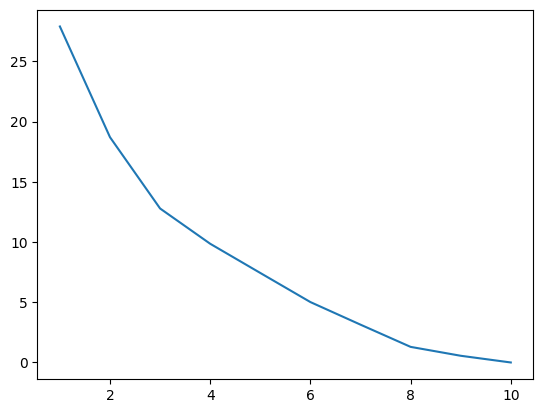

In [141]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=1000)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)

It seems that 3 could be the optimal number for clusters, however, lets try another one just in case.

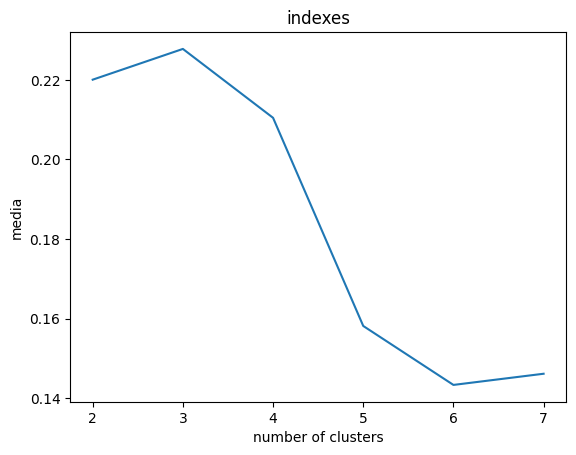

In [143]:
n_of_clusters = range(2,8)
values = []

for n_clusters in n_of_clusters:
    modelKmeans = KMeans(n_clusters=n_clusters)
    labels = modelKmeans.fit_predict(df_norm)
    mediaSilhouette = silhouette_score(df_norm, labels)
    values.append(mediaSilhouette)

plt.plot(n_of_clusters, values)
plt.xlabel("number of clusters")
plt.ylabel("media")
plt.title("indexes")
plt.show()

Indeed the best option for a certain number of clusters is 3

In [142]:
cluster = KMeans(n_clusters=3, max_iter=1000)
groups = cluster.fit(df_norm)
Cc = cluster.cluster_centers_
dfCluster = pd.DataFrame(Cc, columns= df_norm.columns)
dfCluster.round(2).head()

,GP,Poss,Time,Points,FGA,FGM,PPP,WorsePPP,BetterPPP,PossG,...,aFG,FT,TO,SF,PlusOne,Score,centers,centers/foward,foward,guard
0,0.45,0.07,0.07,0.00,0.00,0.0,0.62,0.0,0.0,0.21,...,0.00,1.00,0.0,1.00,0.0,0.62,0.5,0.0,0.50,0.0
1,0.22,0.25,0.53,0.05,0.37,0.2,0.22,0.0,0.0,0.60,...,0.52,0.17,0.0,0.17,0.0,0.19,0.0,0.0,0.25,0.5
2,0.86,0.86,0.44,0.72,0.96,0.8,0.50,0.0,0.0,0.42,...,0.71,0.10,0.5,0.06,0.0,0.52,0.5,0.5,0.00,0.0


And here you the "profile" of the players gotten from the API, of course the API is limited so the results are not 100% accurate, nevertheless it is a great practice. 